In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
plt.style.use(['science', 'notebook'])
import sympy as smp

# Introduction

<p align="center">
  <img src="../images/scattering.PNG" alt="drawing" width="600" align="center"/>
</p>

An incident particle scatters off something, and leaves with solid angle $d\Omega$. Note that

$$d\sigma \propto d\Omega$$

It is related through the differential scattering

$$d\sigma = D(\theta)d\Omega \implies  D(\theta) = \frac{d\sigma}{d\Omega}$$

Relate this to something like density $\rho = \frac{dm}{dV}$ which tells you how much $dm$ there is per volume $dV$. So $d\sigma/d\Omega$ tells you how much $d\sigma$ there is per scattering angle $d\Omega$.

**Quantum Theory**: Incident particle is photon which scatters off electron (*Compton Scattering*):

$$\frac{d\sigma}{d\Omega} = \frac{r_e^2}{2}\frac{1+\cos^2\theta}{1+\alpha(1-\cos\theta)^2} \left[1+\frac{\alpha^2(1-\cos\theta)^2}{(1+\cos^2\theta)(1+\alpha(1-\cos\theta))}\right]$$

* $r_e=2.818\times 10^{-15}$m is the classical electron radius
* $\alpha=E/(mc^2)$ where $E$ is the energy of the incoming photon and $m$ is the mass of the electron

# Problem 1

We want to find the **probability** that a photon scatters at an angle $\theta$

* **Part A**: Compute $d\sigma/d\theta$

* **Part B**: Compute $\sigma$ 

* **Part C**: Use $d\sigma/d\theta$ and $\sigma$ to find the probability density function $f(\theta)$


## Part A

Since

$$\begin{align} \sigma &= \int d\sigma\\ 
&=\int \frac{d\sigma}{d\Omega} d\Omega\\
&= \int_{0}^{2\pi} \int_{0}^{\pi} \frac{d\sigma}{d\Omega} \sin\theta d\theta d\phi\\
&= \int_{0}^{\pi} \left( \int_{0}^{2\pi}  \frac{d\sigma}{d\Omega} \sin\theta d\phi \right) d\theta\\
&= \int_{0}^{\pi} \left( 2\pi  \frac{d\sigma}{d\Omega} \sin\theta \right) d\theta \end{align}$$

We can identify the bracket term as $d\sigma/d\theta$:

$$\frac{d\sigma}{d\theta} = 2\pi  \frac{d\sigma}{d\Omega} \sin\theta$$

In [2]:
theta, alpha = smp.symbols(r'\theta \alpha', real=True, positive=True)

In [3]:
theta, alpha = smp.symbols(r'\theta \alpha', real=True, positive=True)
dsdo = smp.Rational(1,2)*(1+smp.cos(theta)**2)/(1+alpha*(1-smp.cos(theta)))**2 * \
            ( 1 + alpha**2 * (1-smp.cos(theta))**2 / ((1+smp.cos(theta)**2)*(1+alpha*(1-smp.cos(theta)))))
dsdt = 2*smp.pi*dsdo*smp.sin(theta)
dsdt = dsdt.simplify()
dsdt

pi*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*sin(\theta)/(\alpha*(cos(\theta) - 1) - 1)**3

## Part B

We need to compute $\int_0^{\pi} \frac{d\sigma}{d\theta} d\theta$. Good luck doing that without computer algebra:

In [4]:
s = smp.integrate(dsdt, (theta, 0, smp.pi))
s = s.simplify().simplify()
s

pi*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1))/(\alpha**3*(4*\alpha**2 + 4*\alpha + 1))

## Part C

**Extremely Important Point**: If the incoming flux of particles is uniform then
$$p(\theta) = f(\theta)d\theta \propto  \frac{d\sigma}{d\theta}d\theta$$

so we can write 

$$f(\theta) = C\frac{d\sigma}{d\theta}$$

Now we need to enforce $\int_0^{\pi} f(\theta)d\theta = 1$ so this means

$$1 = \int_0^{\pi} f(\theta)d\theta = C\int_0^{\pi} \frac{d\sigma}{d\theta} = C\sigma$$

and thus $C=1/\sigma$ and

$$\boxed{f(\theta) = \frac{1}{\sigma} \frac{d\sigma}{d\theta}}$$

In [5]:
pdf_theta = dsdt / s
pdf_theta=pdf_theta.simplify()
pdf_theta

-\alpha**3*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

We can also get the pdf over the whole sphere 

$$\boxed{g(\theta, \phi) = \frac{1}{\sigma} \frac{d\sigma}{d\Omega}}$$

In [6]:
pdf_omega = dsdo / s
pdf_omega=pdf_omega.simplify()
pdf_omega

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(2*pi*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

Lets make some plots. First lets turn the pdf into a numerical function

In [7]:
pdf_theta_f = smp.lambdify([theta,alpha], pdf_theta)
pdf_omega_f = smp.lambdify([theta,alpha], pdf_omega)

Lets do a simple plot for $\alpha=2$

In [8]:
the = np.linspace(0, np.pi, 1000)
pdf_t = pdf_theta_f(the, 0.1)
pdf_o = pdf_omega_f(the, 0.1)

Use a polar plot where the angle represents the polar angle $\theta$ and the radius represents the probaility density function

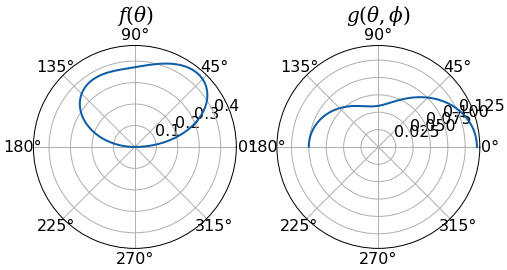

In [9]:
fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
axes[0].plot(the, pdf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(the, pdf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=20)
plt.show()

Get interval of $\theta$ from 0 to $\pi$ and some different values of $\alpha=E/m$ to make an animation

In [10]:
theta = np.linspace(0, np.pi, 1000)
alphas = 10.0** np.linspace(-3,4,300)
pdfs = [pdf_theta_f(theta, alpha) for alpha in alphas]

Make an animation

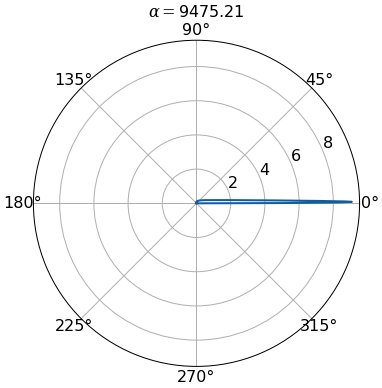

In [81]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ln, = plt.plot([], [])

def animate(i):
    ax.clear()
    ax.plot(theta, pdfs[i])
    ax.set_title(r'$\alpha=$'+f'{alphas[i]:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

# Problem 2

Find the probability density function of

* **Part A**: Outgoing photon energy $E' = \frac{E}{1+\alpha(1-\cos\theta)}$ so need $f(E')$
* **Part B**: Outgoing electron energy $T = E-E' = \frac{E\alpha(1-\cos\theta)}{1+\alpha(1-\cos\theta)}$ so need $f(T)$

**These formulas are just the basic compton scattering formulas you can get from any basic physics textbook!**

(Remember $\alpha = E/(mc^2)$)

## Part A

We know that

$$\begin{align}
f(E') &= \frac{1}{\sigma} \frac{d\sigma}{dE'}\\
&= \frac{1}{\sigma} \frac{d\sigma}{d\theta} \left(\frac{dE'}{d\theta}\right)^{-1}\\
\end{align}$$

We need to find all of these variables in terms of $E'$

In [11]:
E, Ep, alpha, T, theta = smp.symbols(r"E E' \alpha T \theta", real=True, positive=True)

Get expression for $E'$ in terms of other variables

In [12]:
Ep_expr = E/(1+alpha*(1-smp.cos(theta)))
Ep_expr

E/(\alpha*(1 - cos(\theta)) + 1)

In [13]:
Ep - Ep_expr

-E/(\alpha*(1 - cos(\theta)) + 1) + E'

To get $\theta(E')$ (which we need to plug into the expression above), we need to solve `Ep=Ep_expr`

In [14]:
theta_expr = smp.solve(Ep-Ep_expr, theta)[1]
theta_expr

acos((-E + E'*\alpha + E')/(E'*\alpha))

In [15]:
pdf_Ep = 1/s * dsdt / smp.diff(Ep_expr, theta)
pdf_Ep

-\alpha**2*(\alpha*(1 - cos(\theta)) + 1)**2*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(E*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1)))

The problem is its expressed in terms of $\theta$ and not $E'$. We can substitute in our $\theta$ expression above to solve this

In [16]:
pdf_Ep = pdf_Ep.subs(theta, theta_expr).simplify()
pdf_Ep

-(E*(E'**2*\alpha**2 + (-E + E'*\alpha + E')**2) + E'*\alpha**2*(E - E')**2)*(4*\alpha**2 + 4*\alpha + 1)/(E**2*E'**2*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

This should be normalized to 1. We can perform a consistency check by integrating over all values of $E'$. Examining the expression $E' = \frac{E}{1+\alpha(1-\cos\theta)}$, we see that at $\theta=0$, we have $E'=E$ and at $\theta=\pi$ we have $E'=E/(1+2\alpha)$

In [17]:
smp.integrate(pdf_Ep, (Ep, E, E/(1+2*alpha))).simplify()

1

Indeed we are normalized

## Part B

We know that

$$\begin{align}
f(T) &= \frac{1}{\sigma} \frac{d\sigma}{dT}\\
&= \frac{1}{\sigma} \frac{d\sigma}{d\theta} \left(\frac{dT}{d\theta}\right)^{-1}\\
\end{align}$$

We need to find all of these variables in terms of $E'$

In [18]:
T_expr = E*alpha*(1-smp.cos(theta))/(1+alpha*(1-smp.cos(theta)))
theta_expr = smp.solve(T-T_expr, theta)[1]
pdf_T = 1/s * dsdt / smp.diff(T_expr, theta)
pdf_T = pdf_T.subs(theta, theta_expr).simplify()
pdf_T

(\alpha**2*(E - T)*(-E*\alpha + T*\alpha + T + \alpha*(E - T))**2 - (\alpha**2*(E - T)**2 + (-E*\alpha + T*\alpha + T)**2)*(E*\alpha - E - T*\alpha - \alpha*(E - T)))*(4*\alpha**2 + 4*\alpha + 1)/(E*(-E + T)**2*(-E*\alpha + E + T*\alpha + \alpha*(E - T))*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

Again we can check that its normalized. Examining $T=\frac{E\alpha(1-\cos\theta)}{1+\alpha(1-\cos\theta)}$ we have $T=0$ at $\theta=0$ and $T=2E\alpha/(1+2\alpha)$ at $\theta=\pi$

In [19]:
smp.integrate(pdf_T, (T, 0, 2*E*alpha/(1+2*alpha))).simplify()

1

Perfect, we are normalized

# Animation

Lets see what happens to these pdfs as $\alpha$ (ratio of incoming particle energy and $mc^2$) changes

In [20]:
pdf_Ep_f = smp.lambdify([Ep, E, alpha], pdf_Ep)
pdf_T_f = smp.lambdify([T, E, alpha], pdf_T)

Plot for sample value $\alpha=2$

In [21]:
m = 0.511
alpha = 2
E = alpha*m
Ep = np.linspace(E/(1+2*alpha), E, 1000)
T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

Show

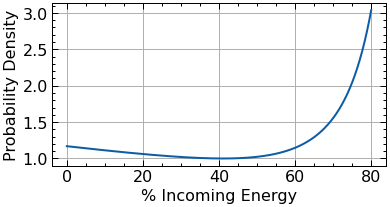

In [28]:
plt.figure(figsize=(6,3))
#plt.plot(100*Ep/(E), -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
plt.plot(100*T/(E), pdf_T_f(T, E, alpha), label='Outgoing Electron')
plt.xlabel('% Incoming Energy')
plt.ylabel('Probability Density')
#plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
plt.grid()
plt.savefig('samp.png', dpi=200)
plt.show()

Get arrays of pdfs for many different values of $\alpha$

In [50]:
alphas = 10.0** np.linspace(-3,4,300)
Eps = [np.linspace(alpha*m/(1+2*alpha), alpha*m, 1000) for alpha in alphas]
Ts = [np.linspace(0, 2*alpha*m*alpha/(1+2*alpha), 1000) for alpha in alphas]
pdfs_Ep = [-pdf_Ep_f(Ep, alpha*m, alpha) for (alpha, Ep) in zip(alphas, Eps)]
pdfs_T = [pdf_T_f(T, alpha*m, alpha) for (alpha, T) in zip(alphas, Ts)]

Create animation

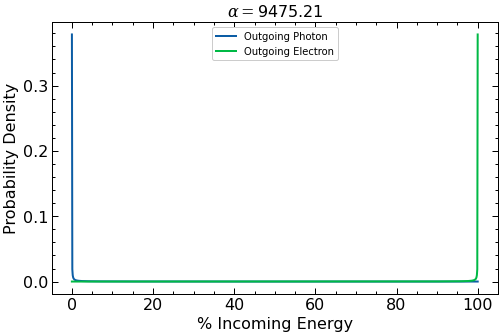

In [102]:
fig, ax = plt.subplots(figsize=(8,5))

def animate(i):
    alpha = alphas[i]; Ep=Eps[i]; T = Ts[i]
    E = m*alpha
    ax.clear()
    ax.plot(100*Ep/E, -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
    ax.plot(100*T/E, pdf_T_f(T, E, alpha), label='Outgoing Electron')
    ax.set_xlabel('% Incoming Energy')
    ax.set_ylabel('Probability Density')
    ax.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
    ax.set_title(r'$\alpha=$'+f'{alpha:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('ani4.gif',writer='pillow',fps=30,dpi=100)